In [1]:
%pip install numpy matplotlib pandas seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Linear Regression Line Equation
### yhat = X*W + b

where:
X: Input data matrix (𝑛×𝑑, where 𝑛 is the number of samples and 𝑑 is the number of features).
𝑊: Weight matrix ( 𝑑×𝑘 where 𝑘 is the number of outputs).
𝑏: Bias vector (1×𝑘).

# Gradients Calculation:
### ∇W = −2/n * XT * (y−yhat)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

class LinearRegression:
    def __init__(self, num_inputs, num_outputs):
        self.weights = np.random.rand(num_inputs, num_outputs)  # Adjusted for multiple outputs
        self.bias = np.random.randn(1, num_outputs)  # Adjusted for multiple outputs

    def forward(self, X):
        return X.dot(self.weights) + self.bias

def train_model(X, y, model, loss_fn, num_epochs=500, alpha=0.05):
    losses = []
    for epoch in range(num_epochs):
        y_hat = model.forward(X)
        loss = loss_fn(y_hat, y)
        losses.append(loss)

        gradient_w = -2 * X.T.dot(y - y_hat) / len(X)
        gradient_b = -2 * np.sum(y - y_hat, axis=0) / len(X)

        model.weights -= alpha * gradient_w
        model.bias -= alpha * gradient_b

    return losses

def MSE(y_hat, y_true):
    return np.mean((y_true - y_hat)**2)

def MAE(y_hat, y_true):
    return np.mean(np.abs(y_true - y_hat))

def R2(y_hat, y_true):
    ss_total = np.sum((y_true - np.mean(y_true, axis=0))**2)
    ss_residual = np.sum((y_true - y_hat)**2)
    return 1 - (ss_residual / ss_total)


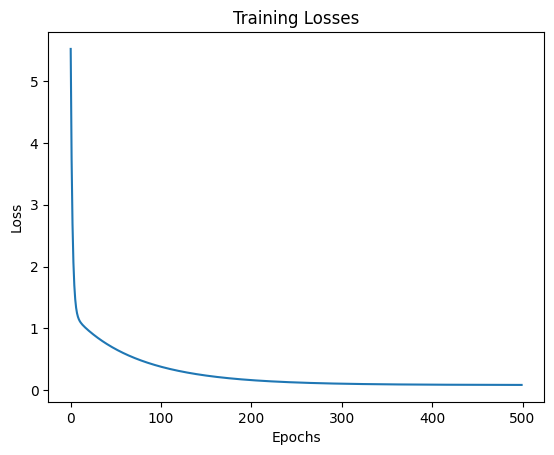

Weights: [[-2.29221916  0.64049847]
 [-1.67936747  0.09640148]]
Bias: [[3.75756059 1.78092069]]


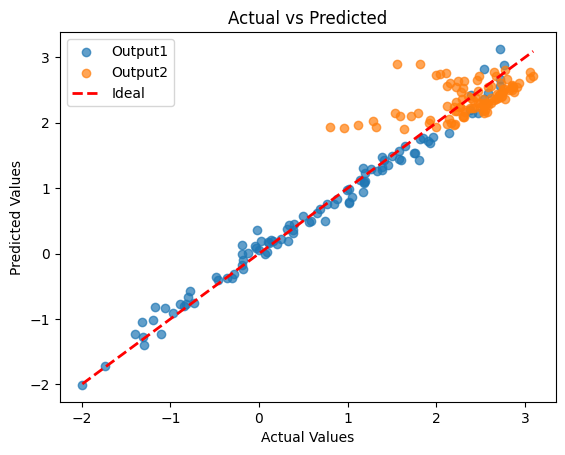

Mean Squared Error (MSE): 0.08439389423011003
Mean Absolute Error (MAE): 0.20667478252675722
R2 Score: 0.8917841977940887


In [12]:
data = pd.read_csv('EndeffectorPosition.csv')

X = data[['Input1', 'Input2']].values
y = data[['Output1', 'Output2']].values  

model = LinearRegression(num_inputs=X.shape[1], num_outputs=y.shape[1])

loss_function = MSE
losses = train_model(X, y, model, loss_function)

plt.plot(losses)
plt.title('Training Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

y_hat = model.forward(X)

print("Weights:", model.weights)
print("Bias:", model.bias)

plt.scatter(y[:, 0], y_hat[:, 0], label='Output1', alpha=0.7)
plt.scatter(y[:, 1], y_hat[:, 1], label='Output2', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Ideal')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

mse = MSE(y_hat, y)
mae = MAE(y_hat, y)
r2 = R2(y_hat, y)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R2 Score: {r2}")